In [39]:
import requests
import json
import os
import pandas as pd
from config import api_key
from citipy import citipy
import random
import matplotlib.pyplot as plt

In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"

sample=500
CityNumber=[]
CityName=[]
Country=[]
Temperature=[]
Latitude=[]
Longitude=[]
Humidity=[]
Cloudness=[]
WindSpeed=[]

city=[]
while len(list(set(city)))<=sample-1:
    lat=round(random.uniform(-90,90),2)
    lon=round(random.uniform(-180,180),2)
    citytest=citipy.nearest_city(lat, lon).city_name.title()
    try:
        query_url = url + "appid=" + api_key + "&q=" + citytest + "&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city.append(weather_json['name'])
        city=list(set(city))
    except (KeyError, IndexError):
        city=city

for i in range(0,sample):
    query_url = url + "appid=" + api_key + "&q=" + city[i] + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    CityNumber.append(weather_json['id'])
    CityName.append(weather_json['name'])
    Country.append(weather_json['sys']['country'])
    Temperature.append(weather_json['main']['temp_max'])
    Latitude.append(weather_json['coord']['lat'])
    Longitude.append(weather_json['coord']['lon'])
    Humidity.append(weather_json['main']['humidity'])
    Cloudness.append(weather_json['clouds']['all'])
    WindSpeed.append(weather_json['wind']['speed'])
    
data=pd.DataFrame({"CityNumber":CityNumber,
              "CityName":CityName,
              "Country":Country,
              "Max Temperature":Temperature, 
              "Latitude":Latitude, 
              "Longitude":Longitude,
              "Humidity (%)":Humidity,
              "Cloudness (%)":Cloudness,
              "WindSpeed":WindSpeed})
data.to_csv("Data.csv", encoding="utf-8", index=False)
data.head()

,CityNumber,CityName,Country,Max Temperature,Latitude,Longitude,Humidity (%),Cloudness (%),WindSpeed
0,3424607,Tasiilaq,GL,17.60,65.61,-37.64,52,0,8.05
1,1160571,Khash,IR,38.72,28.22,61.21,85,64,3.15
2,962367,Richards Bay,ZA,69.09,-28.77,32.06,86,64,4.05
3,468776,Yashalta,RU,27.38,46.34,42.27,90,88,16.35
4,2068655,Katherine,AU,91.40,-14.47,132.26,52,0,4.70


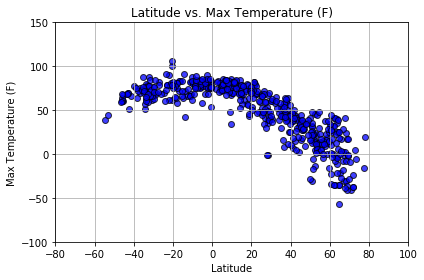

In [41]:
x_axis=data["Latitude"]
y_axis=data["Max Temperature"]
plt.scatter(x_axis, y_axis,c='blue',label='', marker="o", edgecolors="black", alpha=0.75)
plt.ylim(-100, 150)
plt.xlim(-80, 100)
plt.grid()
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Temperature.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

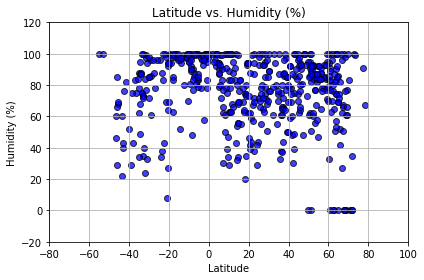

In [42]:
x_axis=data["Latitude"]
y_axis=data["Humidity (%)"]
plt.scatter(x_axis, y_axis,c='blue',label='', marker="o", edgecolors="black", alpha=0.75)
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.grid()
plt.title("Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Humidity.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

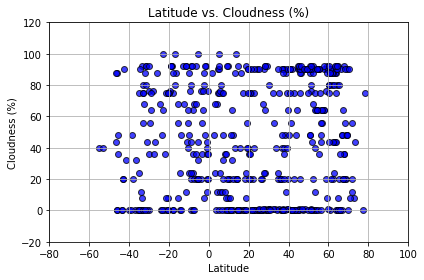

In [43]:
x_axis=data["Latitude"]
y_axis=data["Cloudness (%)"]
plt.scatter(x_axis, y_axis,c='blue',label='', marker="o", edgecolors="black", alpha=0.75)
plt.ylim(-20, 120)
plt.xlim(-80, 100)
plt.grid()
plt.title("Latitude vs. Cloudness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudness (%)")

plt.savefig("Cloudness.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

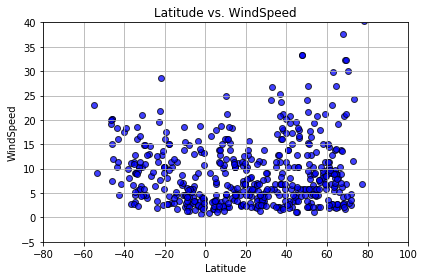

In [44]:
x_axis=data["Latitude"]
y_axis=data["WindSpeed"]
plt.scatter(x_axis, y_axis,c='blue',label='', marker="o", edgecolors="black", alpha=0.75)
plt.ylim(-5, 40)
plt.xlim(-80, 100)
plt.grid()
plt.title("Latitude vs. WindSpeed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")

plt.savefig("WindSpeed.png", bbox_inches="tight")
plt.tight_layout()
plt.show()